## 1000 movies IMDB data

## Table of Contents<hr>

1. Problem Statement  
2. Importing Libraries
3. Pandas Profiling Version  
4. Movies Data of 1000 movies from IMDB  
    4.1. Data Description  
    4.2. Created New Index Column  
    4.3. Rearranging columns  
5. Pandas Profiling before Data Preprocessing  
    5.1 Overview  
    5.2 Warnings  
6. Data Pre-Processing  
    6.1 Fill NAN or null values with mean  
    6.2 Dropping Columns  
    6.3 Finding missing data from pre-processing  
7. Pandas Profiling after Data pre-processing  
    7.1 Overview  
    7.2 Warnings  
8. Exploratory Data Analysis   
    8.1 Movies Released Each Year   
    8.2 Separation of Genre    
    8.3 Distribution of movies throughout years    
    8.4 Genre based movie count    
    8.5 Movie Ratings based on Genre & Year  
	8.6 Movies with Maximum and Minimum Rating  
	8.7 Genre and Year Wise highly voted movies  
	8.8 Movies with Highest and Lowest Votes  
	8.9 Correlation between Rating and Votes using Heatmap  
	8.10 Movies with longest Runtime 
	8.11 Latest movies to watch based on votes.  
	8.12 Box office collection  
    8.13 Box office hit movies from all the data  
	8.14 Box office flop movies from all the data  
	8.15 Box office latest hit and flop movies 
    8.16 Genre based hits and flops
9. Observations  
10. Actionable insights  

## Problem Statement

**IMDB** is an online database of information related to films, television programs, home videos, video games, and streaming content online – including cast, production crew and personal biographies, plot summaries, trivia, ratings, and fan and critical reviews. It was owned by Amazon.com launched on 17 October 1990.

Here's a data set of 1,000 most popular movies on IMDB in the last 10 years. From those movies we are going to find 
- the box office hits and 
- the relation between revenues and rating.  



Let's try to find the box office collection of hit and flop movies along with relation between rating and box office status

## Importing Libraries

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
from pandas_profiling import ProfileReport

## Pandas Profiling Version

In [107]:
pandas_profiling.__version__

'2.11.0'

# Movies Data of 1000 movies from IMDB

#### Here's a data set of 1,000 most popular movies on IMDB in the last 10 years.

In [108]:
file='https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/1000%20movies%20data.csv'
raw_data = pd.read_csv(file)
raw_data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


### Data Description

In [109]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [110]:
raw_data.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


Since "Rank" has outliers from 75% to max.. created new column as "MRank" with correct series of numbers

In [111]:
raw_data['MRank'] = range(1, 1+len(raw_data))
raw_data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,MRank
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,1
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,2
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,3
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,4
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,5


In [112]:
'''changing index of column MRank. 
Making it first column after moving before Rank
'''
col1 = raw_data.columns.tolist()
col1 = col1[-1:] + col1[:-1]
col1

['MRank',
 'Rank',
 'Title',
 'Genre',
 'Description',
 'Director',
 'Actors',
 'Year',
 'Runtime (Minutes)',
 'Rating',
 'Votes',
 'Revenue (Millions)',
 'Metascore']

In [113]:
raw_data = raw_data[col1]
raw_data.head()

,MRank,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [114]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MRank               1000 non-null   int32  
 1   Rank                1000 non-null   int64  
 2   Title               1000 non-null   object 
 3   Genre               1000 non-null   object 
 4   Description         1000 non-null   object 
 5   Director            1000 non-null   object 
 6   Actors              1000 non-null   object 
 7   Year                1000 non-null   int64  
 8   Runtime (Minutes)   1000 non-null   int64  
 9   Rating              1000 non-null   float64
 10  Votes               1000 non-null   int64  
 11  Revenue (Millions)  872 non-null    float64
 12  Metascore           936 non-null    float64
dtypes: float64(3), int32(1), int64(4), object(5)
memory usage: 97.8+ KB


## Pandas Profiling before Data Preprocessing

In [115]:
profile = pandas_profiling.ProfileReport(raw_data)
print(profile)

In [116]:
profile.to_file(output_file="profiling_before_preprocessing.html")

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Overview


Observations from Pandas Profiling before Data Processing


Dataset statistics
---

Number of variables:	13
Number of observations:	1000
Missing cells:	192
Missing cells (%):	1.5%
Duplicate rows:	0
Duplicate rows (%):	0.0%
Total size in memory:	97.8 KiB
Average record size in memory:	100.1 B


Variable types
---
Numeric	8
Categorical	5


Warnings
---
• **Title** has a high cardinality: 999 distinct values	
• **Genre** has a high cardinality: 207 distinct values	
• **Description** has a high cardinality: 1000 distinct values	
• **Director** has a high cardinality: 644 distinct values	
• **Actors** has a high cardinality: 996 distinct values	
• **MRank** is highly correlated with Rank	
• **Rank** is highly correlated with MRank	
• **Revenue (Millions)** has 128 (12.8%) missing values	
• **Metascore** has 64 (6.4%) missing values	
• **MRank** is uniformly distributed	
• **Rank** is uniformly distributed	
• **Title** is uniformly distributed	
• **Description** is uniformly distributed	
• **Director** is uniformly distributed	
• **Actors** is uniformly distributed	
• **MRank** has unique values	
• **Rank** has unique values	
• **Description** has unique 	

# Data Pre-Processing
#### Here we will perform Data Preprocessing on our dataset, to make the data usable for EDA. In order to avoid any errors, please run Pandas Profiling before running the code below.

In [117]:
raw_data.describe()

,MRank,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [118]:
raw_data.head()

,MRank,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


## Fill NAN or null values with mean

In [119]:
raw_data=raw_data.fillna(raw_data.mean()) 

In [120]:
raw_data.columns

Index(['MRank', 'Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors',
       'Year', 'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

### Creating New Index Column

# Dropping Columns
###### We will drop few columns because they don't provide any additional insights into the data
Description,Director,Actors are not required
Rank is covered in MRank.

In [121]:
raw_data.drop(['Rank','Director','Description','Actors'], 1, inplace=True)

In [122]:
raw_data.head()
# raw_data.to_csv('Movies_data.csv')

,MRank,Title,Genre,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",2016,123,6.2,393727,325.02,40.0


## Finding missing data from pre-processing

In [123]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data(raw_data)

,Total,Percent
MRank,0,0.0
Title,0,0.0
Genre,0,0.0
Year,0,0.0
Runtime (Minutes),0,0.0
Rating,0,0.0
Votes,0,0.0
Revenue (Millions),0,0.0
Metascore,0,0.0


# Pandas Profiling after Data Preprocessing

Here, we will perform Pandas Profiling after preprocessing our dataset, so we will name the output file as profiling_after_preprocessing.html.

The file will be stored in the directory of our notebook. Open it using the jupyter notebook file explorer and take a look at it and see what insights you can develop from it.
Or you can output the profiling report in the current jupyter notebook as well as shown in the code below.

In [124]:
profile = pandas_profiling.ProfileReport(raw_data)
print(profile)

In [125]:
profile.to_file(output_file="profiling_after_preprocessing.html")

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Overview 

#### Dataset statistics

- Number of variables	7
- Number of observations	1000
- Missing cells	0
- Missing cells (%)	0.0%
- Duplicate rows	0
- Duplicate rows (%)	0.0%
- Total size in memory	50.9 KiB
- Average record size in memory	52.1 B

#### Variable types

- Numeric	5
- Categorical	2

Warnings
---
- **Title** has a high cardinality: 999 distinct values	
- **Genre** has a high cardinality: 207 distinct values	
- **MRank** is uniformly distributed	
- **Title** is uniformly distributed
- **MRank** has unique values	

# Exploratory Data Analysis

### Exploratory Data Analysis(EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods.

- It includes **cleaning, munging, combining, reshaping, slicing, dicing, and transforming data** for analysis purpose.

- The primary goal of EDA is to maximize the analyst's insight into a data set and into the underlying structure of a data set, while providing all of the specific items that an analyst would want to extract from a data set, such as:

 - A list of outliers.

 - A good-fitting model.

 - Estimates for parameters.

 - Uncertainties for those estimates.

 - A ranked list of important factors.

 - Conclusions as to whether individual factors are statistically significant.
 - A sense of robustness of conclusions.
 - Optimal settings.

## Movies Released Each Year

In [126]:
moviesByYear = raw_data.groupby('Year')['Title'].count().reset_index()
moviesByYear.columns=['Year','TotalMoviesReleased']
moviesByYear.sort_values('TotalMoviesReleased',ascending=False)

,Year,TotalMoviesReleased
10,2016,297
9,2015,127
8,2014,98
7,2013,91
6,2012,64
5,2011,63
4,2010,60
1,2007,53
2,2008,52
3,2009,51


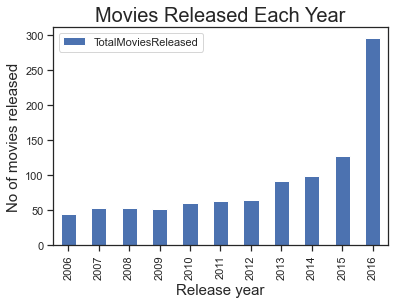

In [127]:
moviesByYear.plot(x='Year', y='TotalMoviesReleased', kind='bar')
plt.xlabel('Release year',fontsize=15)
plt.ylabel('No of movies released',fontsize=15)
plt.title('Movies Released Each Year',fontsize=20)
plt.show()

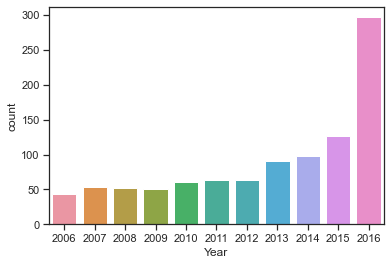

In [128]:
sns.countplot(x="Year",data=raw_data)
plt.show()

In [129]:
def splitDataFrameList(df,target_column,separator):
    
    ''' df = dataframe to split,
    target_column = the column containing the values to split
    separator = the symbol used to perform the split
    returns: a dataframe with each entry for the target column separated, with each element moved into a new row. 
    The values in the other columns are duplicated across the newly divided rows.
    '''
    row_accumulator = []

    def splitListToRows(row, separator):
        split_row = row[target_column].split(separator)
        for s in split_row:
            new_row = row.to_dict()
            new_row[target_column] = s
            row_accumulator.append(new_row)

    df.apply(splitListToRows, axis=1, args = (separator, ))
    new_df = pd.DataFrame(row_accumulator)
    return new_df

raw_data = splitDataFrameList(raw_data,'Genre',',')
# raw_data = splitDataFrameList(raw_data,'Actors',',')
raw_data

,MRank,Title,Genre,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,Action,2014,121,8.1,757074,333.130000,76.0
1,1,Guardians of the Galaxy,Adventure,2014,121,8.1,757074,333.130000,76.0
2,1,Guardians of the Galaxy,Sci-Fi,2014,121,8.1,757074,333.130000,76.0
3,2,Prometheus,Adventure,2012,124,7.0,485820,126.460000,65.0
4,2,Prometheus,Mystery,2012,124,7.0,485820,126.460000,65.0
...,...,...,...,...,...,...,...,...,...
2550,999,Search Party,Adventure,2014,93,5.6,4881,82.956376,22.0
2551,999,Search Party,Comedy,2014,93,5.6,4881,82.956376,22.0
2552,1000,Nine Lives,Comedy,2016,87,5.3,12435,19.640000,11.0
2553,1000,Nine Lives,Family,2016,87,5.3,12435,19.640000,11.0


# Distribution of movies throughout years

In [130]:
raw_data['Genre'].value_counts()

Drama        513
Action       303
Comedy       279
Adventure    259
Thriller     195
Crime        150
Romance      141
Sci-Fi       120
Horror       119
Mystery      106
Fantasy      101
Biography     81
Family        51
Animation     49
History       29
Sport         18
Music         16
War           13
Western        7
Musical        5
Name: Genre, dtype: int64

Text(0.5, 1.0, 'Distribution of movies throught years')

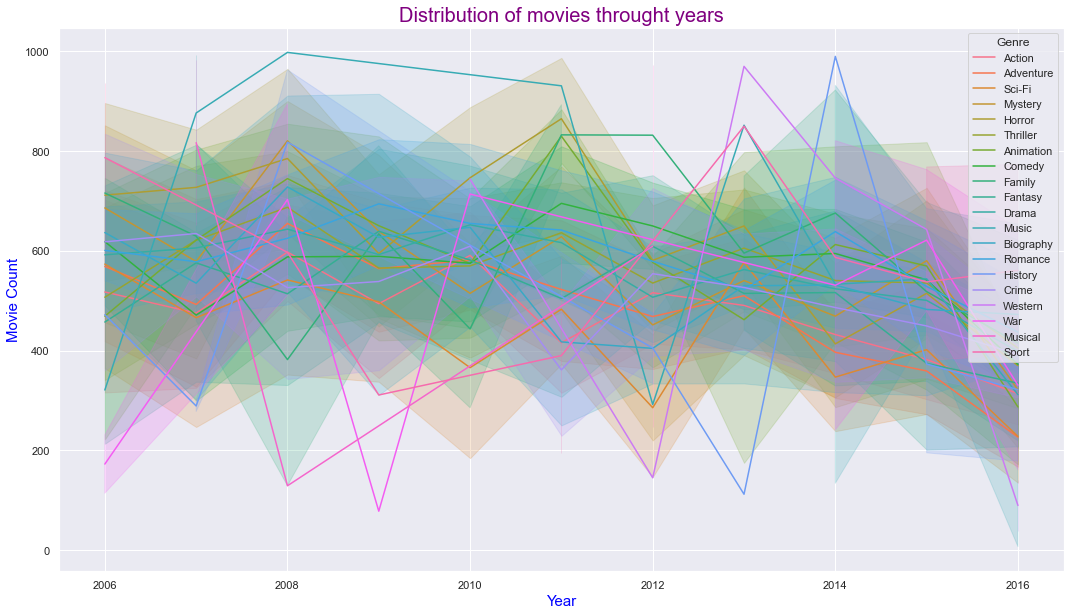

In [131]:
#trends over season in ipl
plt.figure(figsize=(18,10))
sns.set(color_codes=True)                                               
sns.set_palette(sns.color_palette("cividis"))
# sns.histplot(raw_data.Year,bins=20)
sns.lineplot(data=raw_data,  x="Year", y="MRank", hue="Genre", markers=True)
# plt.legend(title='Movies')
plt.xlabel('Year', color='blue',fontsize=15)
plt.ylabel('Movie Count', color='blue',fontsize=15)
plt.title('Distribution of movies throught years',color='purple',fontsize=20)

### Genre wise movie counts

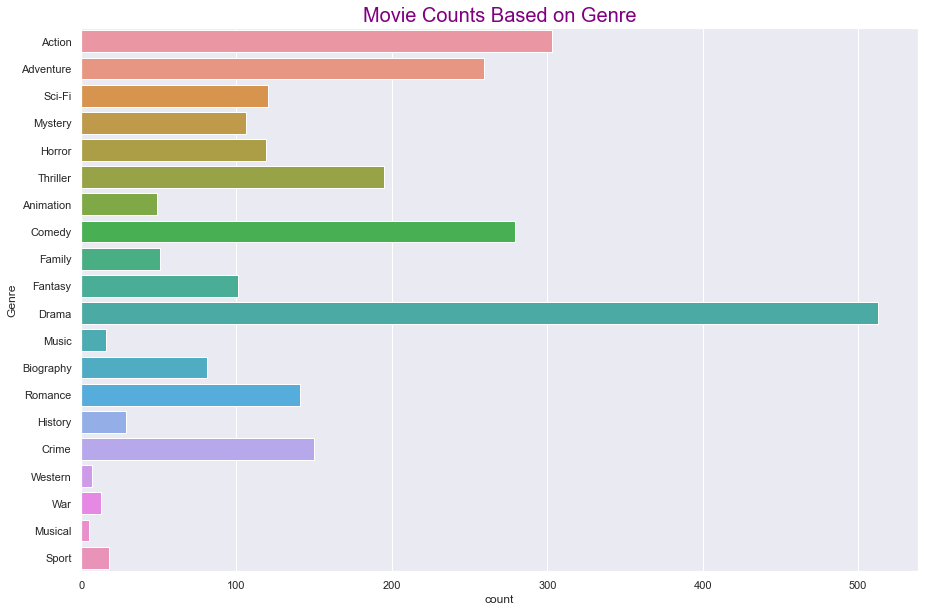

In [132]:
plt.figure(figsize=(15,10))
sns.set(color_codes=True)                                               
sns.set_palette(sns.color_palette("rainbow_r"))
sns.countplot(y='Genre', data=raw_data)
plt.title('Movie Counts Based on Genre',fontsize=20, color='purple')
plt.show()

## Movie Ratings based on Genre & Year

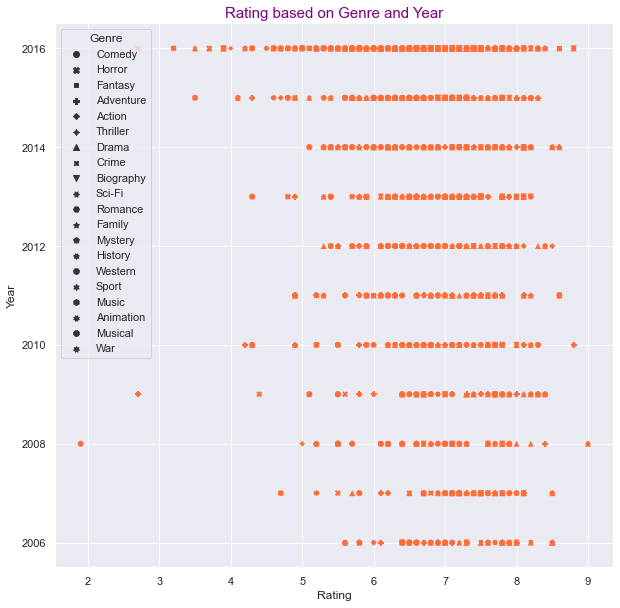

In [133]:
plt.figure(figsize=(10,10))
plt.title('Rating based on Genre and Year',fontsize=15, color='purple')
sns.despine( right=True)
sns.scatterplot(y="Year",x="Rating",palette="ch:r=-.2,d=.3_r",linewidth=0
               ,style='Genre',data=raw_data.sort_values("Rating"))
plt.show()

## Movies with Maximum and Minimum Rating

In [134]:
df_rating =raw_data[(raw_data["Rating"]==max(raw_data["Rating"]))|(raw_data["Rating"]== min(raw_data["Rating"]))]
df_rating = pd.DataFrame(df_rating, columns=['Title',"Genre",'Rating'])
df_rating

,Title,Genre,Rating
136,The Dark Knight,Action,9.0
137,The Dark Knight,Crime,9.0
138,The Dark Knight,Drama,9.0
2142,Disaster Movie,Comedy,1.9


## Genre and Year Wise highly voted movies

In [135]:
df_vote = raw_data.groupby(["Genre","Year"]).agg({'Votes':'max'}).reset_index()
df_vote.value_counts

<bound method DataFrame.value_counts of        Genre  Year    Votes
0     Action  2006   637104
1     Action  2007   531112
2     Action  2008  1791916
3     Action  2009   935408
4     Action  2010  1583625
..       ...   ...      ...
190  Western  2012  1039115
191  Western  2013   190855
192  Western  2014   144779
193  Western  2015    31149
194  Western  2016   122853

[195 rows x 3 columns]>

## Movies with Highest and Lowest Votes

In [136]:
df_voting =raw_data[(raw_data["Votes"]==max(raw_data["Votes"]))|(raw_data["Votes"]== min(raw_data["Votes"]))]
df_voting = pd.DataFrame(df_voting, columns=['Title',"Genre",'Votes'])
df_voting

,Title,Genre,Votes
136,The Dark Knight,Action,1791916
137,The Dark Knight,Crime,1791916
138,The Dark Knight,Drama,1791916
1231,Paint It Black,Drama,61


## Correlation between Rating and Votes using Heatmap

<AxesSubplot:>

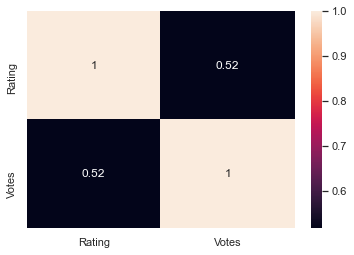

In [137]:
df_rel=pd.DataFrame(raw_data, columns=['Rating','Votes'])
sns.heatmap(df_rel.corr(), annot = True)

Votes and Rating values are highly correlated

## Movies with longest Runtime

In [138]:
df_longRuntime = pd.DataFrame(
                raw_data[raw_data['Runtime (Minutes)']>=160].sort_values('Runtime (Minutes)',ascending=False),
                columns=['Title','Runtime (Minutes)']).drop_duplicates()
df_longRuntime

,Title,Runtime (Minutes)
2140,Grindhouse,191
229,The Hateful Eight,187
807,La vie d'Adèle,180
2472,Inland Empire,180
212,The Wolf of Wall Street,180
700,Cloud Atlas,172
1111,3 Idiots,170
94,Interstellar,169
710,The Hobbit: An Unexpected Journey,169
194,Pirates of the Caribbean: At World's End,169


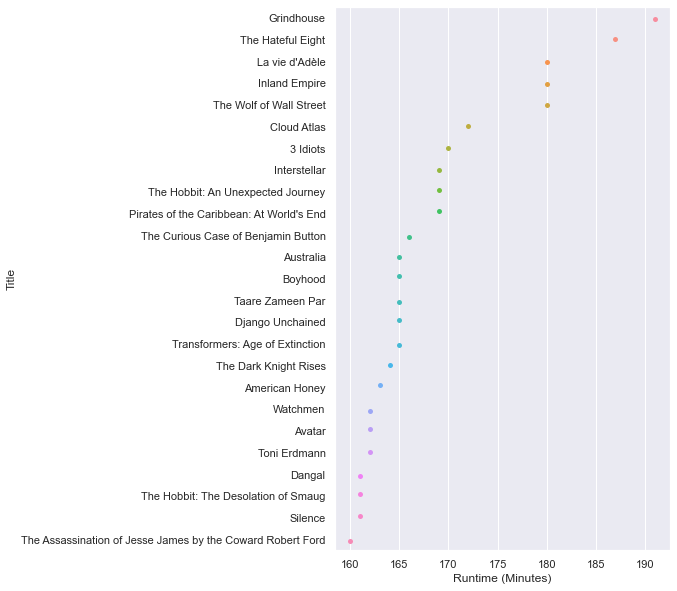

In [139]:
plt.figure(figsize=(6,10))
sns.despine(bottom=True, left=True)                                           
sns.color_palette("flare", as_cmap=True)
sns.stripplot(y="Title",x="Runtime (Minutes)",data=df_longRuntime, dodge=True, alpha=0.95, zorder=1)
plt.show()

### Latest movies to watch based on votes.

In [140]:
df_new_movies=raw_data[raw_data['Year']==max(raw_data['Year'])].drop_duplicates('Title')
df_new_movies=df_new_movies.sort_values(['Votes','Rating'],ascending=[False,False])
df_new_movies=df_new_movies[['Title','Year','Rating','Votes']].head(10)
df_new_movies

,Title,Year,Rating,Votes
84,Deadpool,2016,8.0,627797
152,Batman v Superman: Dawn of Justice,2016,6.7,472307
90,Captain America: Civil War,2016,7.9,411656
11,Suicide Squad,2016,6.2,393727
52,Arrival,2016,8.0,340798
33,Rogue One,2016,7.9,323118
189,Zootopia,2016,8.1,296853
96,Doctor Strange,2016,7.6,293732
81,X-Men: Apocalypse,2016,7.1,275510
17,La La Land,2016,8.3,258682


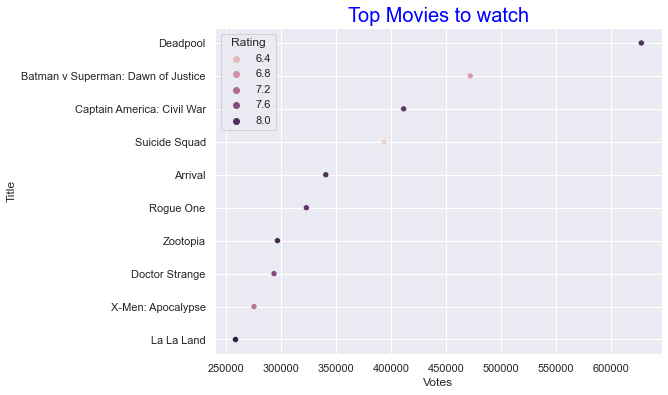

In [141]:
plt.figure(figsize=(8,6))
plt.title('Top Movies to watch',fontsize=20, color='Blue')
sns.scatterplot(x='Votes',y = 'Title',hue="Rating",   data=df_new_movies); 
plt.show()

## Box office collection

We are getting movies which have more revenue than average one in decreasing order of Revenue. Since the data is split based on genre, we will rempve duplicate rows based on title. It will help to get 10 Box office hit movies.

### Box office hit movies from all the data
Here we are going to show 10 box office hit movies based on revenue and rating

In [142]:
box_office_hit = raw_data[raw_data['Revenue (Millions)']>raw_data['Revenue (Millions)'].mean()].drop_duplicates(
                subset=['Title'],keep='first').sort_values('Revenue (Millions)',ascending=False)
box_office_hit=box_office_hit[['Title','Year','Rating','Metascore','Votes','Revenue (Millions)']]
box_office_hit.value_counts()

Title                                        Year  Rating  Metascore  Votes   Revenue (Millions)
2012                                         2009  5.8     49.0       297984  166.11                1
Talladega Nights: The Ballad of Ricky Bobby  2006  6.6     66.0       137502  148.21                1
The Amazing Spider-Man                       2012  7.0     66.0       474320  262.03                1
Terminator Salvation                         2009  6.6     49.0       297093  125.32                1
Terminator Genisys                           2015  6.5     38.0       205365  89.73                 1
                                                                                                   ..
Jurassic World                               2015  7.0     59.0       455169  652.18                1
Just Go with It                              2011  6.4     33.0       182069  103.03                1
Kickboxer: Vengeance                         2016  4.9     37.0       6809    131.56   

In [143]:
box_office_hit=df_box_office.head(10)
box_office_hit

NameError: name 'df_box_office' is not defined

In [ ]:
sns.relplot(x="Revenue (Millions)", y="Title", style="Rating", hue="Metascore", alpha=.9,height=6,s=170,
            palette="ch:r=-.5,l=.75", data=box_office_hit);
plt.tight_layout()
plt.show()

From above plot, we can understand that 
- Hit movies **Star Wars: Episode VII - The Force Awakens** has largest revenue.
- **The Dark Knight** has the highest rating as well as critically acclaimed

### Box office flop movies from all the data
Here we are going to show 10 box office flop movies based on revenue and rating

In [ ]:
box_office_flop = raw_data[raw_data['Revenue (Millions)']<raw_data['Revenue (Millions)'].mean()].drop_duplicates(
                subset=['Title'],keep='first').sort_values('Revenue (Millions)',ascending=True)
box_office_flop=box_office_flop[['Title','Year','Rating','Metascore','Votes','Revenue (Millions)']]
box_office_flop=box_office_flop.head(10)
box_office_flop

In [ ]:
sns.relplot(x="Revenue (Millions)", y="Title", style="Rating", hue="Metascore", 
            palette="ch:r=-.25,l=.75", data=box_office_flop,s=90,height=7);
# plt.tight_layout()
plt.show()

From above plot we can understand that 
- **A Kind of Murder** has been flop movie of all
- Flop movies **Wakefield** and **Love, Rosie** has smallest revenue despite of critcs score and rating. 


## Box office latest hit and flop movies

Here we are going to identify the latest movies by the year and then group them individually into flop and hit movies and merge them

In [ ]:
'''
- filter has been applied on year and revenue columns based on the order of revenue
- duplicate rows have been dropped to avoid repeated data
'''
df_bolh = raw_data[(raw_data['Year']==max(raw_data['Year']) )
                   & (raw_data['Revenue (Millions)']>raw_data['Revenue (Millions)'].mean())].drop_duplicates(
                subset=['Title'],keep='first').sort_values('Revenue (Millions)',ascending=False).head(10)
df_bolh['Status']='Hit'
# print(df_bolh)

db_bolf = raw_data[(raw_data['Year']==max(raw_data['Year'])) & 
                   (raw_data['Revenue (Millions)']<raw_data['Revenue (Millions)'].mean())].drop_duplicates(
                subset=['Title'],keep='first').sort_values('Revenue (Millions)',ascending=True).head(10)
db_bolf['Status']='Flop'
# print(db_bolf)

df_bo_lm = df_bolh.append(db_bolf)
df_bo_lm =df_bo_lm[['Title','Year','Rating','Metascore','Votes','Revenue (Millions)','Status']]
df_bo_lm=df_bo_lm.sort_values(['Rating','Revenue (Millions)','Votes','Metascore'],ascending=[True,True,True,True])
df_bo_lm

In [ ]:
plt.figure(figsize=(6,10))
sns.set_theme(style="ticks")
sns.scatterplot(data=df_bo_lm,x="Revenue (Millions)", y="Title",style='Rating',s=100,hue="Status",palette='Set2')
plt.show()

## Genre based hits and flops 

In [ ]:
'''
- filter has been applied on year and revenue columns based on the order of revenue
- duplicate rows have been dropped to avoid repeated data
'''
df_bomx = raw_data[raw_data['Revenue (Millions)']>raw_data['Revenue (Millions)'].mean()].drop_duplicates(subset=['Genre'],keep='first')
df_bomx['Status']='Hit'
df_bomx=df_bomx.groupby(['Status','Genre']).agg({'Rating':'max','Revenue (Millions)':'max'
                                                   ,'Votes':'max','Metascore':'max'}).reset_index()
print(df_bomx)

df_bomn = raw_data[raw_data['Revenue (Millions)']<raw_data['Revenue (Millions)'].mean()].drop_duplicates(subset=['Genre'],keep='first')
df_bomn['Status']='Flop'
df_bomn=df_bomn.groupby(['Status','Genre']).agg({'Rating':'min','Revenue (Millions)':'min'
                                                   ,'Votes':'min','Metascore':'min'}).reset_index()

df_bo = df_bomx.append(df_bomn).sort_values('Rating',ascending=False)

In [ ]:
plt.figure(figsize=(8,10))
sns.barplot(y="Genre",x="Revenue (Millions)", data=df_bo,hue='Status',linewidth=0,palette='rocket')
plt.tight_layout() 
plt.show()

## Observations


- As the rating has increased the revenue has increased as well resulting into great box office collections.   
- **Rogue One** has the highest box office collection followed by **Finding Dory** and **The Jungle Book**.  
- **_Dead Awake_** flopped on box office followed by **A Kind of Murder** and **King Cobra** and **The Void**.  


- Genre **Crime** has the highest Hits followed by **adventure,Sci-Fi,Action and Fantasy**  
- Genre **Western** has given most flops as compared to hits
- Genres **Animation , Drama, Biography** & **Thriller** has the least flops as compared to hits

- **Metascore** does not define box office hits and flops  
- **Box office collection** is highly related to Rating. Hence, **Rating** plays an important role in defining whether the movie is hit or flop.

### Actionable insights

- PR teams needs to concentrate on identifying ways to get more rating and votes for their movies. 
- Gaining exposure leads to voting which directly heads to rating process giving realistic view as more the votes, better the rating gets
- Makers can look into below facts while making movie
    - Viewers has shown more interest in **Crime, Adventure,Sci-fi, Action** and **Fantasy**. 
    - Genres like **Animation, Biography ,Drama** and **Thriller** has the less flops as compared to others. Hence, these are the safest one to pick.
